# Plotting

Plots elliptic curve moment and bias data generated from CalculateMoments.cpp in various forms.

Authors: Chris Yao

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from math import sqrt
plt.rcParams['text.usetex'] = True
data_path = "data"
image_path = 'images'

-60.077507940321084


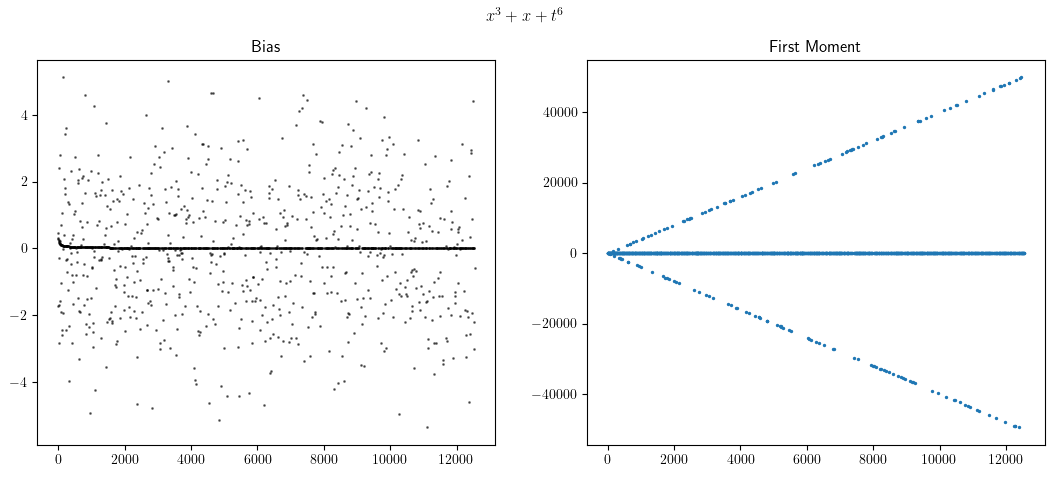

In [3]:
# bias = False

# The forgotten ones:
# family = "t,0,1" # negative bias, easy 1st moment
# family = "0,t-1,t3" # just noise on bias
# family = "2,12t4,t" # noise on bias
# family = "t2,t,1" 
# family = "t3,t+3,0" 
# family = "1,1,-t3-t"
# family = "t2,0,t2"
# family = "0,0,t4+1" # dont use, constant j
# family = "0,0,t5+1" # dont use, constant j
# family = "0,0,t6+1" # dont use, constant j
# family = "0,t4+4t3-16t+4,t3-3719"
# family = "0,t4-t+2,t3+1"
# family = "t4-t2+4t,0,t6+17t3-7t2+2"
# family = "0,t,1"
# family = "0,-t4,t2" # strong negative bias
# family = "0,t5-t,-5t3+8t2"
# family = "t,t,t2" # too nice, probably done, 4th moment is nice
# family = "t7,t,1"
# family = "0,1,t" # BASE OF THE GOOD FAMILY, 4th moment also nice
# family = "0,2,t"
# family = "0,-1,t"
# family = "0,1,t2"
# family = "0,-1,t2"
# family = "0,2,t2"
# family = "0,t,t" #4th is nice
# family = "0,-t,t"
# family = "0,t,-t"
# family = "0,1,t4"
# family = "0,1,t5"
# family = "0,1,t7"
# family = "0,1,-t4"
# family = "0,-1,t3" # semi interesting? Sum of bias is pos
# family = "0,-1,t6"
# family = "0,1,-t6"
# family = "0,1,t9"
# family = "0,-1,t9"



# Interesting ones:
# family = "0,1,t4" # one pos, two neg biases
# family = "t+1,t,0" # miller thesis
# family = "t,-t-3,1" # miller thesis
# family = "0,t5,t" #two negative biases?
# family = "t3,t4+3,2t" #interesting first moment
# family = "0,1,-t3" #moment 1, POSITIVE BIAS ----------------------------
family = "0,1,t3" #moment 1, POSITIVE BIAS -------------------------------
# family = "0,t,t3" # calculable 1st moment
# family = "0,t2,1" # Positive and negative bias? Negative is weak if so?
# family = "0,t3,1" #bias strong, moment 1 is strong
# family = "0,1,t6" # Even more bias?



df = pd.read_csv(f"{data_path}/{family},final.txt", index_col = False, header=None)
# df = df[(df[0] % 12 == 1) | (df[0] % 12 == 7) ]

df["bias"] = (df[2] - df[0]**2)/(df[0]**(1.5))
# df["corrected_bias"] = (df[2] - df[0]**2 - df[0]**1)/(df[0]**(3/2))

f, axs = plt.subplots(1, 2, figsize=(13, 5))

print(sum(df.bias))
axs[0].scatter(df[0], df.bias, s=1, alpha = 0.5, color="black")
# axs[0].plot(range(1,3002), [1/sqrt(x) for x in range(1,3002)], color="red", alpha=0.3)
axs[0].set_title("Bias")
# axs[0].set_xlim(0,3000)
# axs[0].set_ylim(-10, 10)
# axs[0].set_ylim(-.00001, .00001)

axs[1].scatter(df[0], df[1], s=2)
axs[1].set_title("First Moment")
# axs[1].set_xlim(500,3000)
plt.suptitle("$x^3 + x + t^6$")
# plt.savefig(f"{image_path}/x^3 + x + t^6.png")
plt.show()


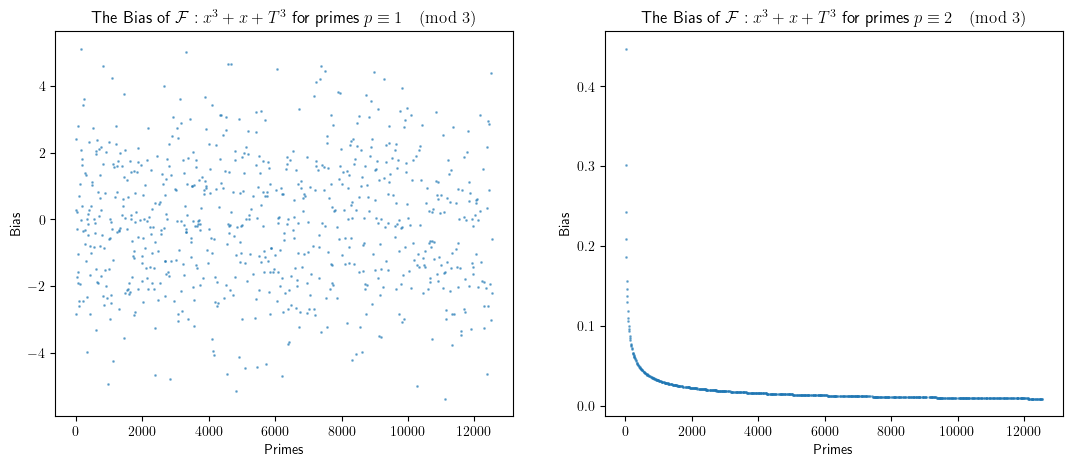

In [5]:
f, axs = plt.subplots(1, 2, figsize=(13, 5))
one_mod_three = df[df[0] % 3 == 1]
two_mod_three = df[df[0] % 3 == 2]

# plt.scatter(df[0], df.bias, s=1, alpha = 0.5, color="black")
axs[0].scatter(one_mod_three[0], one_mod_three.bias, s=1, alpha = 0.5)
axs[0].set_title(r"The Bias of $\mathcal{F}: x^3 + x + T^3$ for primes $p\equiv 1\pmod{3}$")
axs[0].set_xlabel("Primes")
axs[0].set_ylabel("Bias")


axs[1].scatter(two_mod_three[0], two_mod_three.bias, s=1, alpha = 0.5)
# axs[1].plot(range(1,12000), [1/sqrt(x) for x in range(1,12000)], color="black", alpha=0.3)
axs[1].set_title(r"The Bias of $\mathcal{F}: x^3 + x + T^3$ for primes $p\equiv 2\pmod{3}$")
axs[1].set_xlabel("Primes")
axs[1].set_ylabel("Bias")

# plt.savefig(f"{image_path}/bias_split_by_mod.png")
plt.show()

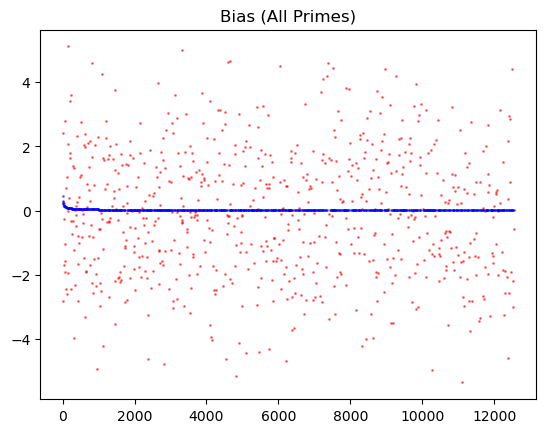

In [67]:
plt.scatter(one_mod_three[0], one_mod_three.bias, s=1, alpha = 0.5, color="red")
plt.scatter(two_mod_three[0], two_mod_three.bias, s=1, alpha = 0.5, color="blue")

# axs[0].plot(range(1,3002), [1/sqrt(x) for x in range(1,3002)], color="red", alpha=0.3)
# axs[0].set_title("Bias")
# axs[0].set_xlim(0,3000)
# axs[0].set_ylim(-10, 10)
# axs[0].set_ylim(-.00001, .00001)

# axs[1].scatter(df[0], df[1], s=2)
# axs[1].set_title("First Moment")
# axs[1].set_xlim(500,3000)
plt.title("Bias (All Primes)")
plt.savefig(f"{image_path}/bias_all_primes_colored.png")
plt.show()

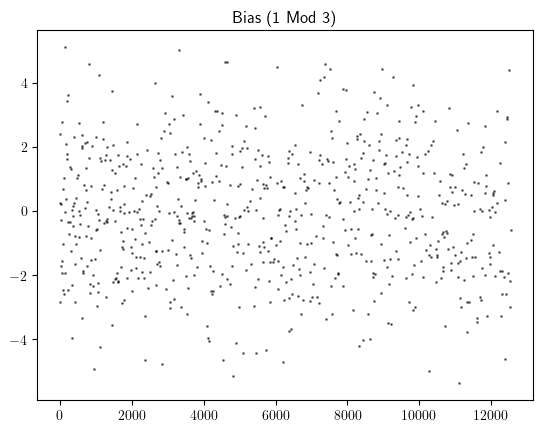

In [6]:
plt.scatter(one_mod_three[0], one_mod_three.bias, s=1, alpha = 0.5, color="black")
# axs[0].plot(range(1,3002), [1/sqrt(x) for x in range(1,3002)], color="red", alpha=0.3)
# axs[0].set_title("Bias")
# axs[0].set_xlim(0,3000)
# axs[0].set_ylim(-10, 10)
# axs[0].set_ylim(-.00001, .00001)

# axs[1].scatter(df[0], df[1], s=2)
# axs[1].set_title("First Moment")
# axs[1].set_xlim(500,3000)
plt.title("Bias (1 Mod 3)")
plt.savefig(f"{image_path}/bias_1_mod_3.png")
plt.show()

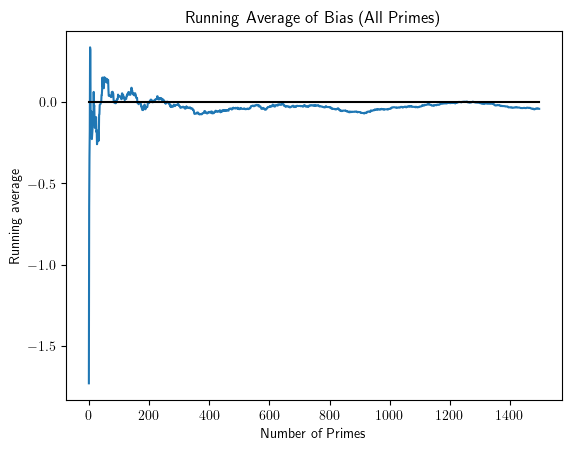

In [114]:
tmp_df = df

start = 1
plt.plot(range(start,len(tmp_df)), [sum(tmp_df.bias[0: i])/i for i in range(start,len(tmp_df))])
# plt.ylim(-.25,.25)
plt.plot([start - 1, len(tmp_df)], [0,0], color="black")
plt.title("Running Average of Bias (All Primes)")
plt.xlabel("Number of Primes")
plt.ylabel("Running average")
plt.savefig(f"{image_path}/running_avg_all.png")
plt.show()

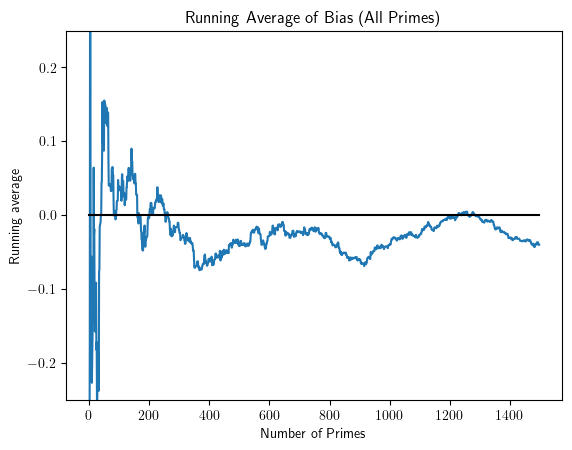

In [113]:
tmp_df = df

start = 1
plt.plot(range(start,len(tmp_df)), [sum(tmp_df.bias[0: i])/i for i in range(start,len(tmp_df))])
plt.ylim(-.25,.25)
plt.plot([start - 1, len(tmp_df)], [0,0], color="black")
plt.title("Running Average of Bias (All Primes)")
plt.xlabel("Number of Primes")
plt.ylabel("Running average")

plt.savefig(f"{image_path}/zoom_running_avg_all.png")
plt.show()

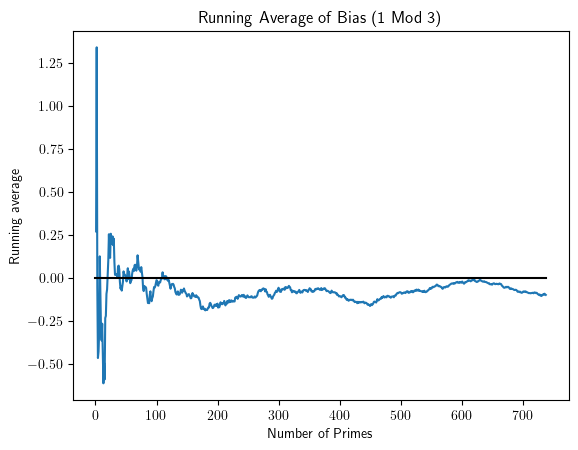

In [119]:
tmp_df = one_mod_three

start = 1
plt.plot(range(start,len(tmp_df)), [sum(tmp_df.bias[0: i])/i for i in range(start,len(tmp_df))])
# plt.ylim(-.25,.25)
plt.plot([start - 1, len(tmp_df)], [0,0], color="black")
plt.title("Running Average of Bias (1 Mod 3)")
plt.xlabel("Number of Primes")
plt.ylabel("Running average")
plt.savefig(f"{image_path}/running_avg_1_mod_3.png")
plt.show()

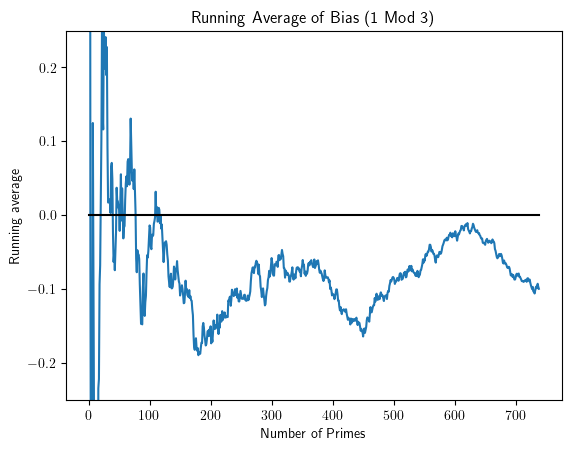

In [120]:
tmp_df = one_mod_three

start = 1
plt.plot(range(start,len(tmp_df)), [sum(tmp_df.bias[0: i])/i for i in range(start,len(tmp_df))])
plt.ylim(-.25,.25)
plt.plot([start - 1, len(tmp_df)], [0,0], color="black")
plt.title("Running Average of Bias (1 Mod 3)")
plt.xlabel("Number of Primes")
plt.ylabel("Running average")
plt.savefig(f"{image_path}/zoom_running_avg_1_mod_3.png")
plt.show()

In [4]:
excision_amt = 500
excised = df[excision_amt:].reset_index(drop=True)
excised_one_mod_three = excised[excised[0] % 3 == 1]
excised_two_mod_three = excised[excised[0] % 3 == 2]

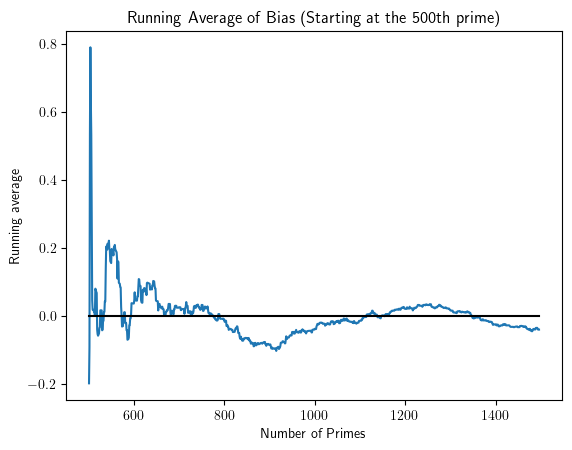

In [8]:
tmp_df = excised

start = 1
plt.plot(range(excision_amt+start,excision_amt+len(tmp_df)), [sum(tmp_df.bias[0: i])/i for i in range(start,len(tmp_df))])
# plt.ylim(-.25,.25)
plt.plot([excision_amt+start - 1, excision_amt+len(tmp_df)], [0,0], color="black")
plt.title("Running Average of Bias (Starting at the 500th prime)")
plt.xlabel("Number of Primes")
plt.ylabel("Running average")
plt.savefig(f"{image_path}/excised_running_avg_all.png")
plt.show()


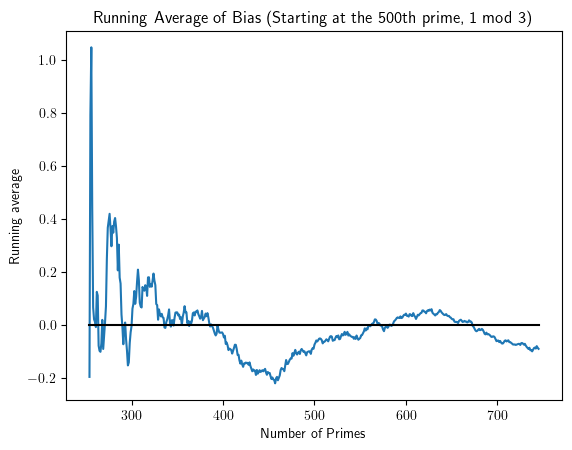

In [22]:
tmp_df = excised_one_mod_three

start = 1
plt.plot(range(253+start,253+len(tmp_df)), [sum(tmp_df.bias[0: i])/i for i in range(start,len(tmp_df))])
# plt.ylim(-.25,.25)
plt.plot([253+start - 1,253+ len(tmp_df)], [0,0], color="black")
plt.title("Running Average of Bias (Starting at the 500th prime, 1 mod 3)")
plt.xlabel("Number of Primes")
plt.ylabel("Running average")
# plt.savefig(f"{image_path}/excised_running_avg_1_mod_3.png")
plt.show()
